# 🏛 Class 3: Support Vector Machine 🏛

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# 🔬 Activity: We have medical data! 

* Two features (neurotransmitters) involved in brain chemistry:
    * Serotonin
    * Dopamine
* The target shows the brain health, which indicates having or not having depression.
    * So 1 means healthy. -1 means unhealthy, or depressed.
    * **X1** is serotonin, and **X2** is dopamine (I believe)

In [2]:
df = pd.read_csv('SVM_Dataset1.csv', index_col=0)
print(df)

         X1        X2  y
0  2.947814  6.626878  1
1  2.530388  7.785050  1
2  3.566991  5.651046  1
3  3.156983  5.467077  1
4  2.582346  4.457777 -1
5  2.155826  6.222343 -1
6  3.273418  3.520687 -1


# Build the X<sub>training</sub> and Y<sub>training</sub> arrays
*This is a small dataset. That's why we're **training** with the whole thing, when usually we would split the dataset into **training** and **test** parts.*

### Mathematical conventions for data scientists:
* Multiple columns / matrix = use uppercase (X1, X2)
* Single column / vector = use lowercase (y)

In [3]:
# import numpy as np

X1 = df['X1'] #serotonin
X2 = df['X2'] #dopamine
X_train = np.array(list(zip(X1,X2)))
X_train

array([[2.947814, 6.626878],
       [2.530388, 7.78505 ],
       [3.566991, 5.651046],
       [3.156983, 5.467077],
       [2.582346, 4.457777],
       [2.155826, 6.222343],
       [3.273418, 3.520687]])

In [4]:
y_train = df['y'].values #health status
print(y_train)

[ 1  1  1  1 -1 -1 -1]


# For visualization, assign color & label to each target class

In [5]:
color_ls = []
for k in y_train:
    if k == 1:
        color_ls.append('b')
    else:
        color_ls.append('r')
color_ls

['b', 'b', 'b', 'b', 'r', 'r', 'r']

In [6]:
label = []
for k in y_train:
    if k == 1:
        label.append('H')
    else:
        label.append('NH')
label

['H', 'H', 'H', 'H', 'NH', 'NH', 'NH']

# Scatterplot of data with our newly minted labels

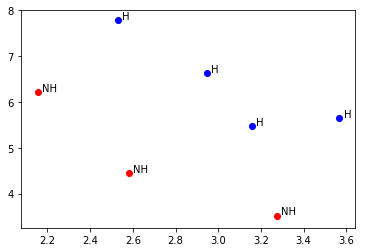

In [7]:
# import matplotlib.pyplot as plt

for k, (i, j) in enumerate(X_train): #for index, (serotonin, dopamine)
    plt.scatter(i, j, c = color_ls[k])
    plt.text(i+0.02, j+0.02, label[k])

### SO NOW! 😃 Obtain the best line (hyperplane) that separates these two groups

In [8]:
# from sklearn import svm

svm_classifier = svm.SVC(kernel='linear', C=10) #hmm high C
svm_classifier.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [9]:
# This is purely for visualization. Milad says there's no need to explain. He outright said to copy and paste, so don't worry about understanding this in-depth.
def plot_decision_boundary(clf, X, y):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max),np.arange(x2_min, x2_max))
    Z = clf.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, colors='b', levels=[-1, 0, 1], alpha=0.4, linestyles=['--', '-', '--'])
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

# omg yes behold the LINE OF BEST FIT

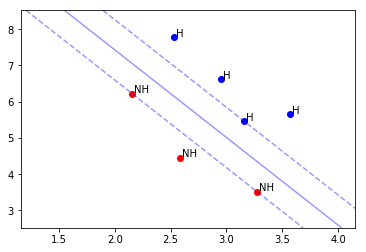

In [10]:
plot_decision_boundary(svm_classifier, X_train, y_train)

for k, (i,j) in enumerate(X_train):
    plt.scatter(i, j, c = color_ls[k])
    plt.text(i+0.02, j+0.02, label[k])

### Number of support vectors for each class:

In [11]:
svm_classifier.n_support_

array([2, 1], dtype=int32)

### What are the coordinates of those support vectors?

In [12]:
svm_classifier.support_vectors_

array([[2.155826, 6.222343],
       [3.273418, 3.520687],
       [3.156983, 5.467077]])

### Let's find the slopes (weights) and intercept:

In [13]:
slope = svm_classifier.coef_
intercept = svm_classifier.intercept_
print('weights: ' + str(slope))
print('intercept: ' + str(intercept))

weights: [[2.90336685 1.20121959]]
intercept: [-14.73321143]


### Milad says: Am I healthy? He goes to the doctor and asks for his result....

In [14]:
svm_classifier.predict([[3,6]])

array([1])

### Yay! That 1 means healthy! Good, Milad is not depressed :)

# 💪 Activity: SVM training!

Let's try replicating what we did above with a new dataset!

In [15]:
df = pd.read_csv('SVM_Dataset2.csv', index_col=0)
print(df.head())

     X1  X2  y
0   7.0  20 -1
1   8.0  12 -1
2   9.0  19 -1
3  10.0  17 -1
4  11.0  15 -1


# Build the X<sub>training</sub> and Y<sub>training</sub> arrays

In [16]:
X1 = df['X1']
X2 = df['X2']
X_train = np.array(list(zip(X1, X2)))
X_train

array([[ 7. , 20. ],
       [ 8. , 12. ],
       [ 9. , 19. ],
       [10. , 17. ],
       [11. , 15. ],
       [13. , 14. ],
       [14. , 12. ],
       [15. , 14. ],
       [15. , 17. ],
       [16. , 16. ],
       [ 4. , 15. ],
       [ 5.5, 12. ],
       [ 7. , 10. ],
       [ 8. , 10. ],
       [ 9. ,  9. ],
       [10. ,  8. ],
       [11. ,  5. ],
       [12. ,  7. ],
       [12. ,  9. ],
       [13. , 10. ]])

In [17]:
y_train = df['y'].values
y_train

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1])

# Visualization! Colors & labels for each target class

In [18]:
color_ls = []
for k in y_train:
    if k == 1:
        color_ls.append('b')
    else:
        color_ls.append('r')
label = []
for k in y_train:
    if k == 1:
        label.append('H')
    else:
        label.append('NH')

# Let's see this scatterplot

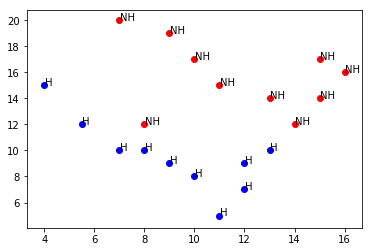

In [19]:
for k, (i,j) in enumerate(X_train):
    plt.scatter(i, j, c = color_ls[k])
    plt.text(i+0.02, j+0.02, label[k])

# Let's plot a line of best fit, as we did before.

In [20]:
svm_classifier = svm.SVC(kernel='linear', C=10)
svm_classifier.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

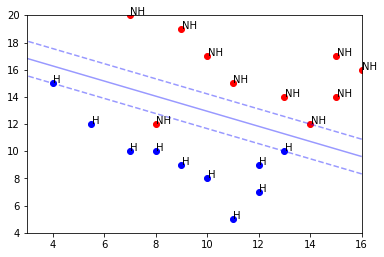

In [21]:
plot_decision_boundary(svm_classifier, X_train, y_train)

for k, (i,j) in enumerate(X_train):
    plt.scatter(i, j, c = color_ls[k])
    plt.text(i+0.02, j+0.02, label[k])

### Hmm... doesn't look quite right. Let's change the <span style="color: purple">kernel</span> parameter in <span style="color: purple">svm_classifier</span>.

In [24]:
svm_classifier = svm.SVC(kernel='poly', C=10, degree=2)
svm_classifier.fit(X_train, y_train)

/Users/cherishkim/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

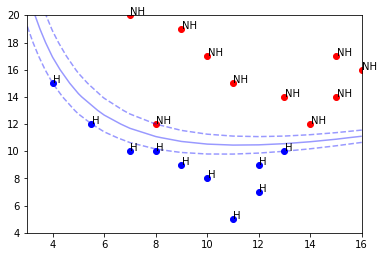

In [25]:
plot_decision_boundary(svm_classifier, X_train, y_train)

for k, (i,j) in enumerate(X_train):
    plt.scatter(i, j, c = color_ls[k])
    plt.text(i + 0.02, j+ 0.02, label[k])

# ⚖️ Unbalanced classes

Using a linear hyperplane/line of best fit doesn't always work.

* Reference: https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane_unbalanced.html

# 👀 <span style="color: red">See Milad or Kash @ office hours</span> to understand this better

In [22]:
n_sample_1 = 1000
n_sample_2 = 100
centers = [[0.0, 0.0], [2.0,2.0]]
clusters_std = [1.5,0.5]

Automatically created module for IPython interactive environment


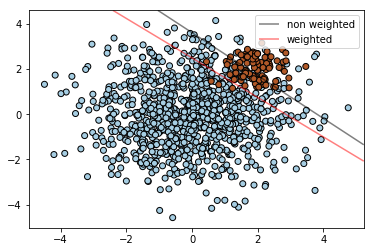

In [23]:
print(__doc__)

# we create two clusters of random points
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel='linear', class_weight={1: 10})
wclf.fit(X, y)

# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

# plot the decision functions for both classifiers
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the separating hyperplane
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
a = ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

# get the separating hyperplane for weighted classes
Z = wclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins for weighted classes
b = ax.contour(XX, YY, Z, colors='r', levels=[0], alpha=0.5, linestyles=['-'])

plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"],
           loc="upper right")
plt.show()